In [1]:
%load_ext autoreload
%autoreload 2

In [81]:
import os.path
from torch.utils.data import DataLoader
from project_function import SummaryDataSet, split_data, TitlePartyModel, run_n_epochs, plot_losses, SimilarityFilteredSummaryDataSet
import torch

In [3]:
token_data_path = os.path.join(os.getcwd(), "..", "data", "tokenized")

In [4]:
resample_train_files, resample_validation_files, resample_test_files = split_data(token_data_path, "shrunk", 0.6, party_filter=0)

test : summary_bill_1811_1392996-shrunk.pkl
train: summary_bill_1811_1393002-shrunk.pkl
train: summary_bill_1811_1393017-shrunk.pkl
train: summary_bill_1811_1393022-shrunk.pkl
train: summary_bill_1811_1393028-shrunk.pkl
train: summary_bill_1811_1393029-shrunk.pkl
test : summary_bill_1811_1393038-shrunk.pkl
train: summary_bill_1811_1393039-shrunk.pkl
train: summary_bill_1811_1393051-shrunk.pkl
test : summary_bill_1811_1393052-shrunk.pkl
validate summary_bill_1811_1393057-shrunk.pkl
train: summary_bill_1811_1393064-shrunk.pkl
train: summary_bill_1811_1393077-shrunk.pkl
test : summary_bill_1811_1393079-shrunk.pkl
validate summary_bill_1811_1393083-shrunk.pkl
train: summary_bill_1811_1393084-shrunk.pkl
train: summary_bill_1811_1393085-shrunk.pkl
train: summary_bill_1811_1393086-shrunk.pkl
train: summary_bill_1811_1393090-shrunk.pkl
test : summary_bill_1811_1393097-shrunk.pkl
validate summary_bill_1811_1393098-shrunk.pkl
train: summary_bill_1811_1393110-shrunk.pkl
train: summary_bill_1811_1

In [5]:
print(f'{len(resample_train_files)} training files, {len(resample_validation_files)} validation files, {len(resample_test_files)} test files')

263 training files, 90 validation files, 92 test files


In [99]:
single_resample_train_dataset = SummaryDataSet(resample_train_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")
single_resample_validation_dataset = SummaryDataSet(resample_validation_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")
single_resample_test_dataset = SummaryDataSet(resample_test_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393002-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393017-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393022-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393028-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393029-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393039-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393051-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [100]:
single_train_dataloader = DataLoader(single_resample_train_dataset, batch_size=1, shuffle=False)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
single_validate_dataloader = DataLoader(single_resample_test_dataset, batch_size=1, shuffle=False)
single_test_dataloader = DataLoader(single_resample_train_dataset, batch_size=1, shuffle=False)

In [101]:
num_epochs = 10
single_resample_model = TitlePartyModel()
if torch.cuda.is_available():
    single_resample_model.cuda()
single_loss_fun_ms3e = torch.nn.MSELoss()
single_rms_optimizer = torch.optim.RMSprop(single_resample_model.parameters(), lr=0.01, momentum=0.9)
single_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(single_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [102]:
torch.autograd.set_detect_anomaly(True)
single_checkpoint, single_train_losses, single_validation_losses = run_n_epochs(num_epochs,
                                                          single_resample_model,
                                                          single_loss_fun_ms3e,
                                                          single_rms_optimizer,
                                                          single_train_dataloader,
                                                          single_validate_dataloader,
                                                          "resample_single",
                                                          single_lrd_schedulers)

epoch 0
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.1657, 0.3196, 0.2566, 0.2581]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.18645614385604858
turn off training
epoch loss 0.18645614385604858
applying model.eval()
LOSS train 0.18645614385604858 valid 1.8175951466570944e-14
stepping scheduler
epoch 1
turn on training
running one epoch


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[8.4267e-08, 7.7868e-08, 5.1924e-08, 1.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.8175951466570944e-14
turn off training
epoch loss 1.8175951466570944e-14
applying model.eval()
LOSS train 1.8175951466570944e-14 valid 1.3277929262976396e-25
stepping scheduler
epoch 2
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[4.8765e-13, 4.5059e-13, 3.0047e-13, 1.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.3277929262976396e-25
turn off training
epoch loss 1.3277929262976396e-25
applying model.eval()
LOSS train 1.3277929262976396e-25 valid 1.468606277881599e-34
stepping scheduler
epoch 3
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[1.6219e-17, 1.4985e-17, 9.9925e-18, 1.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.468606277881599e-34
turn off training
epoch l

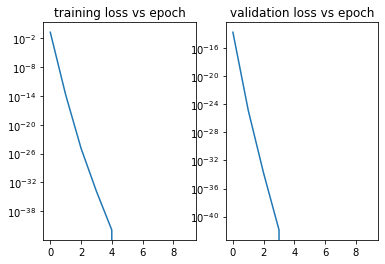

In [103]:
plot_losses(single_train_losses, single_validation_losses)

In [109]:
single_party_0_resample_train_dataset = SummaryDataSet(resample_train_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
single_party_0_resample_validation_dataset = SummaryDataSet(resample_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
single_party_0_resample_test_dataset = SummaryDataSet(resample_test_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
single_party_0_train_dataloader = DataLoader(single_party_0_resample_train_dataset, batch_size=1, shuffle=True)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
single_party_0_validate_dataloader = DataLoader(single_party_0_resample_validation_dataset, batch_size=1, shuffle=False)
single_party_0_test_dataloader = DataLoader(single_party_0_resample_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393002-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393017-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393022-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393028-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393029-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393039-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393051-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [110]:
num_epochs = 10
single_party_0_resample_full_model = TitlePartyModel()
if torch.cuda.is_available():
    single_party_0_resample_full_model.cuda()
single_party_0_loss_fun_ms3e = torch.nn.MSELoss()
single_party_0_rms_optimizer = torch.optim.RMSprop(single_party_0_resample_full_model.parameters(), lr=0.0001, momentum=0.9)
single_party_0_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(single_party_0_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [111]:
full_checkpoint, party_0_full_train_losses, party_0_full_validation_losses = run_n_epochs(num_epochs,
                                                          single_party_0_resample_full_model,
                                                          single_party_0_loss_fun_ms3e,
                                                          single_party_0_rms_optimizer,
                                                          single_party_0_train_dataloader,
                                                          single_party_0_validate_dataloader,
                                                          "single_party_0_resample_full",
                                                          single_party_0_lrd_schedulers)

epoch 0
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2216, 0.2627, 0.2351, 0.2806]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1727517992258072


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0026, 0.0026, 0.0024, 0.9925]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.8832963178283535e-05
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0022, 0.0022, 0.0021, 0.9935]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.4039569578017108e-05
turn off training
epoch loss 1.1490350516396575e-05
applying model.eval()
LOSS train 1.1490350516396575e-05 valid 1.1450721103756223e-05
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0019, 0.0020, 0.0019, 0.9941]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.1450712918303907e-05
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0016, 0.0017, 0.0016, 0.9951]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 7.853631359466817e-06
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0012, 0.0014, 0.0013, 0.9961]], devi

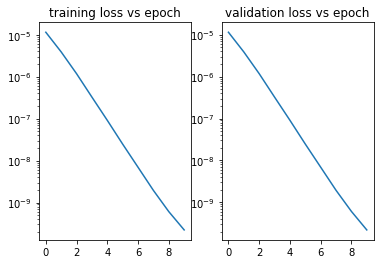

In [112]:
plot_losses(party_0_full_train_losses, party_0_full_validation_losses)

In [20]:
party_0_full_train_losses

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [34]:
encodings = [np.array(d.cpu()) for d,l in single_party_0_resample_train_dataset]
similarities = cosine_similarity(encodings)

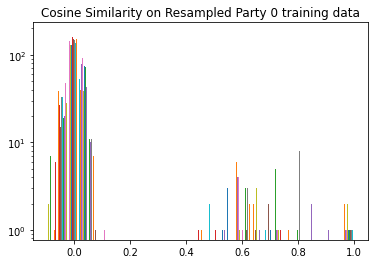

In [36]:
plt.hist(similarities, bins=30)
plt.yscale('log')
plt.title("Cosine Similarity on Resampled Party 0 training data")
plt.show()

In [48]:
first_encoding = encodings[0]

In [49]:
tail_encodings = encodings[1:-1]

In [50]:
similarities_against_first = cosine_similarity([first_encoding], tail_encodings)

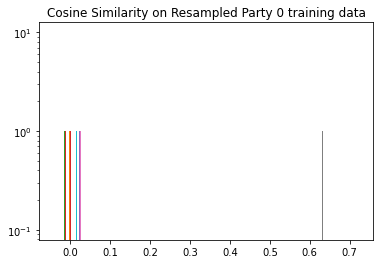

In [58]:
plt.hist(similarities_against_first, bins=30)
plt.yscale('log')
plt.title("Cosine Similarity on Resampled Party 0 training data")
plt.show()

In [67]:
similarities_against_first[similarities_against_first > 0.5]

array([0.6035789 , 0.6085105 , 0.6300482 , 0.651182  , 0.68705106,
       0.5839732 , 0.7126442 , 0.70250905, 0.724276  , 0.65752465,
       0.6300482 ], dtype=float32)

In [68]:
one_vs_two_similarity = cosine_similarity([first_encoding],[encodings[1]])

In [69]:
one_vs_two_similarity

array([[-0.01210979]], dtype=float32)

In [84]:
filtered_training_dataset = SimilarityFilteredSummaryDataSet(resample_train_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393002-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393017-shrunk.pkl
[[-0.01210978]]
rejecting C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393017-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393022-shrunk.pkl
[[-0.00418296]]
rejecting C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393022-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393028-shrunk.pkl
[[0.00095473]]
rejecting C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393028

In [90]:
filtered_validation_dataset = SimilarityFilteredSummaryDataSet(resample_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393057-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393083-shrunk.pkl
[[-0.00165586]]
rejecting C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393083-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393098-shrunk.pkl
[[-0.00570336]]
rejecting C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393098-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393129-shrunk.pkl
[[0.01878593]]
rejecting C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393129

In [95]:
print(f'filtered {len(filtered_training_dataset)} training items, filtered {len(filtered_validation_dataset)} validation items')

filtered 12 training items, filtered 6 validation items


In [91]:
filtered_single_party_0_train_dataloader = DataLoader(filtered_training_dataset, batch_size=1, shuffle=True)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
filtered_single_party_0_validate_dataloader = DataLoader(filtered_validation_dataset, batch_size=1, shuffle=False)

In [106]:
num_epochs = 10
filtered_single_party_0_resample_full_model = TitlePartyModel()
if torch.cuda.is_available():
    filtered_single_party_0_resample_full_model.cuda()
filtered_single_party_0_loss_fun_ms3e = torch.nn.MSELoss()
filtered_single_party_0_rms_optimizer = torch.optim.RMSprop(filtered_single_party_0_resample_full_model.parameters(), lr=0.00001, momentum=0.9)
filtered_single_party_0_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(filtered_single_party_0_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [107]:
full_checkpoint, party_0_full_train_losses, party_0_full_validation_losses = run_n_epochs(num_epochs,
                                                          filtered_single_party_0_resample_full_model,
                                                          filtered_single_party_0_loss_fun_ms3e,
                                                          filtered_single_party_0_rms_optimizer,
                                                          filtered_single_party_0_train_dataloader,
                                                          filtered_single_party_0_validate_dataloader,
                                                          "filtered_single_party_0_resample_full",
                                                          filtered_single_party_0_lrd_schedulers)

epoch 0
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2235, 0.2457, 0.3025, 0.2282]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19936434924602509
turn off training
epoch loss 0.00842374935746193
applying model.eval()
LOSS train 0.00842374935746193 valid 0.006930708419531584
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0331, 0.0551, 0.0549, 0.8569]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.0069048781879246235
turn off training
epoch loss 0.0024720518849790096
applying model.eval()
LOSS train 0.0024720518849790096 valid 0.0023666152264922857
stepping scheduler
epoch 2
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.0181, 0.0330, 0.0324, 0.9164]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.0023631048388779163
turn off training
epoch loss 0.0018003360601

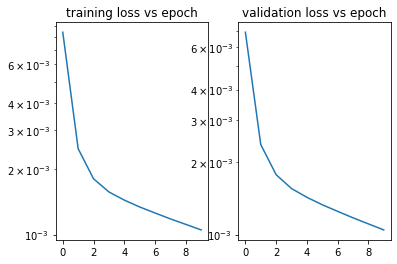

In [108]:
plot_losses(party_0_full_train_losses, party_0_full_validation_losses)